In [96]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
from google.colab import files
uploaded = files.upload()

Saving credit-approval_csv - pandas.csv to credit-approval_csv - pandas (2).csv


In [98]:
credit = pd.read_csv('credit-approval_csv - pandas.csv')
credit

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [99]:
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [100]:
credit.replace('?', np.NaN, inplace = True)
credit["Age"] = pd.to_numeric(credit["Age"])


In [101]:
credit.fillna(credit.mean(), inplace=True)

In [102]:
def imputeWithMode(df):
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(credit)

In [103]:
credit_drop=credit

In [104]:
credit_drop=credit.drop(["ZipCode"],axis=1)

In [105]:
credit_drop


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,-


In [106]:
credit_drop.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married  ... DriversLicense Citizen Income  Approved
0        b  30.83   0.000       u  ...              f       g      0         +
1        a  58.67   4.460       u  ...              f       g    560         +
2        a  24.50   0.500       u  ...              f       g    824         +
3        b  27.83   1.540       u  ...              t       g      3         +
4        b  20.17   5.625       u  ...              f       s      0         +
..     ...    ...     ...     ...  ...            ...     ...    ...       ...
685      b  21.08  10.085       y  ...              f       g      0         -
686      a  22.67   0.750       u  ...              t       g    394         -
687      a  25.25  13.500       y  ...              t       g      1         -
688      b  17.92   0.205       u  ...              f       g    750         -
689      b  35.00   3.375       u  ...              t       g      0         -

[690 rows x 15 co

In [107]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [108]:
credit_drop.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,1442,0


In [109]:
credit_dummies = pd.get_dummies(credit_drop, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense"])
credit_dummies.head()

,Gender,Age,Debt,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,Married_0,Married_1,Married_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,EducationLevel_7,EducationLevel_8,EducationLevel_9,EducationLevel_10,EducationLevel_11,EducationLevel_12,EducationLevel_13,Citizen_0,Citizen_1,Citizen_2,DriversLicense_0,DriversLicense_1
0,1,30.83,0.000,0,7,1.25,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,58.67,4.460,0,3,3.04,1,1,6,560,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,0,24.50,0.500,0,3,1.50,1,0,0,824,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,1,27.83,1.540,0,7,3.75,1,1,5,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,20.17,5.625,0,7,1.71,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [110]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'Ethnicity', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1'],
      dtype='object')

In [111]:
credit_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int64  
 1   Age                690 non-null    float64
 2   Debt               690 non-null    float64
 3   BankCustomer       690 non-null    int64  
 4   Ethnicity          690 non-null    int64  
 5   YearsEmployed      690 non-null    float64
 6   PriorDefault       690 non-null    int64  
 7   Employed           690 non-null    int64  
 8   CreditScore        690 non-null    int64  
 9   Income             690 non-null    int64  
 10  Approved           690 non-null    int64  
 11  Married_0          690 non-null    uint8  
 12  Married_1          690 non-null    uint8  
 13  Married_2          690 non-null    uint8  
 14  EducationLevel_0   690 non-null    uint8  
 15  EducationLevel_1   690 non-null    uint8  
 16  EducationLevel_2   690 non

In [112]:
credit_dummies.describe()

,Gender,Age,Debt,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,Married_0,Married_1,Married_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,EducationLevel_7,EducationLevel_8,EducationLevel_9,EducationLevel_10,EducationLevel_11,EducationLevel_12,EducationLevel_13,Citizen_0,Citizen_1,Citizen_2,DriversLicense_0,DriversLicense_1
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,0.475362,5.098551,2.223406,0.523188,0.427536,2.40000,1017.385507,0.555072,0.002899,0.760870,0.236232,0.078261,0.211594,0.059420,0.043478,0.036232,0.076812,0.085507,0.014493,0.073913,0.055072,0.113043,0.004348,0.092754,0.055072,0.905797,0.011594,0.082609,0.542029,0.457971
std,0.460464,11.853273,4.978163,0.850238,2.510731,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318,0.053799,0.426862,0.425074,0.268776,0.408735,0.236581,0.204079,0.187002,0.266485,0.279838,0.119597,0.261819,0.228287,0.316876,0.065842,0.290297,0.228287,0.292323,0.107128,0.275490,0.498592,0.498592
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,0.000000,7.000000,1.000000,1.000000,0.000000,0.00000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,37.707500,7.207500,0.000000,7.000000,2.625000,1.000000,1.000000,3.00000,395.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.250000,28.000000,2.000000,8.000000,28.500000,1.000000,1.000000,67.00000,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


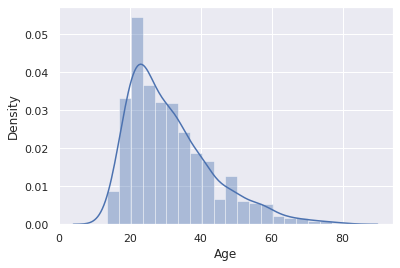

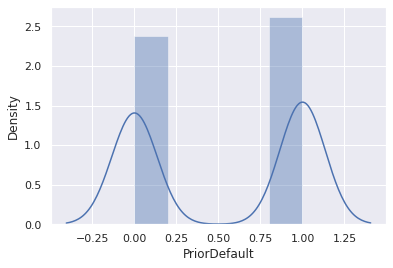

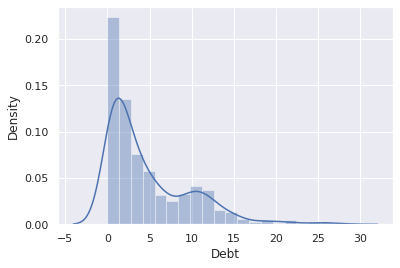

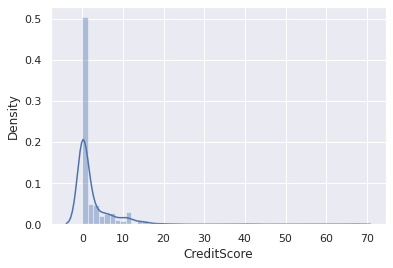

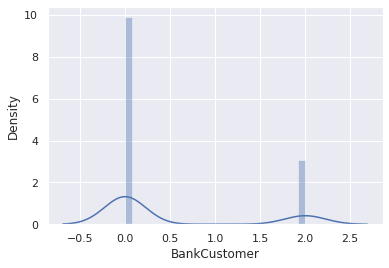

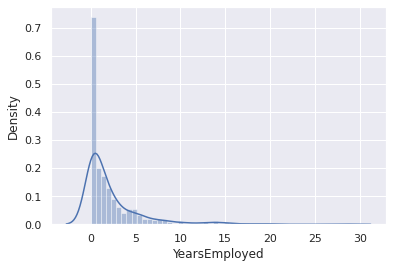

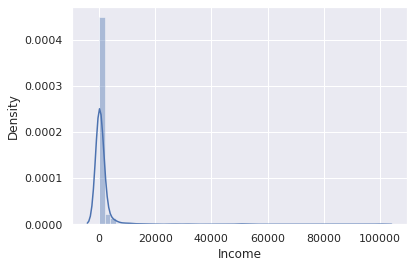

<Figure size 432x288 with 0 Axes>

In [113]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(credit_drop['Age'])
plotDistPlot(credit_drop['PriorDefault'])
plotDistPlot(credit_drop['Debt'])
plotDistPlot(credit_drop['CreditScore'])
plotDistPlot(credit_drop['BankCustomer'])
plotDistPlot(credit_drop['YearsEmployed'])
plotDistPlot(credit_drop['Income'])
plt.savefig('Distribution.jpeg')

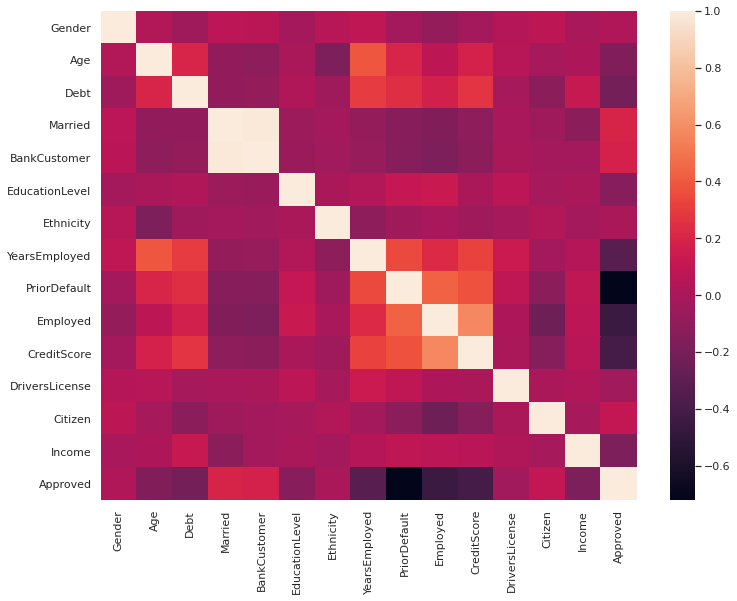

In [114]:
#cooooo
corr = credit_drop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('corelation.jpg')

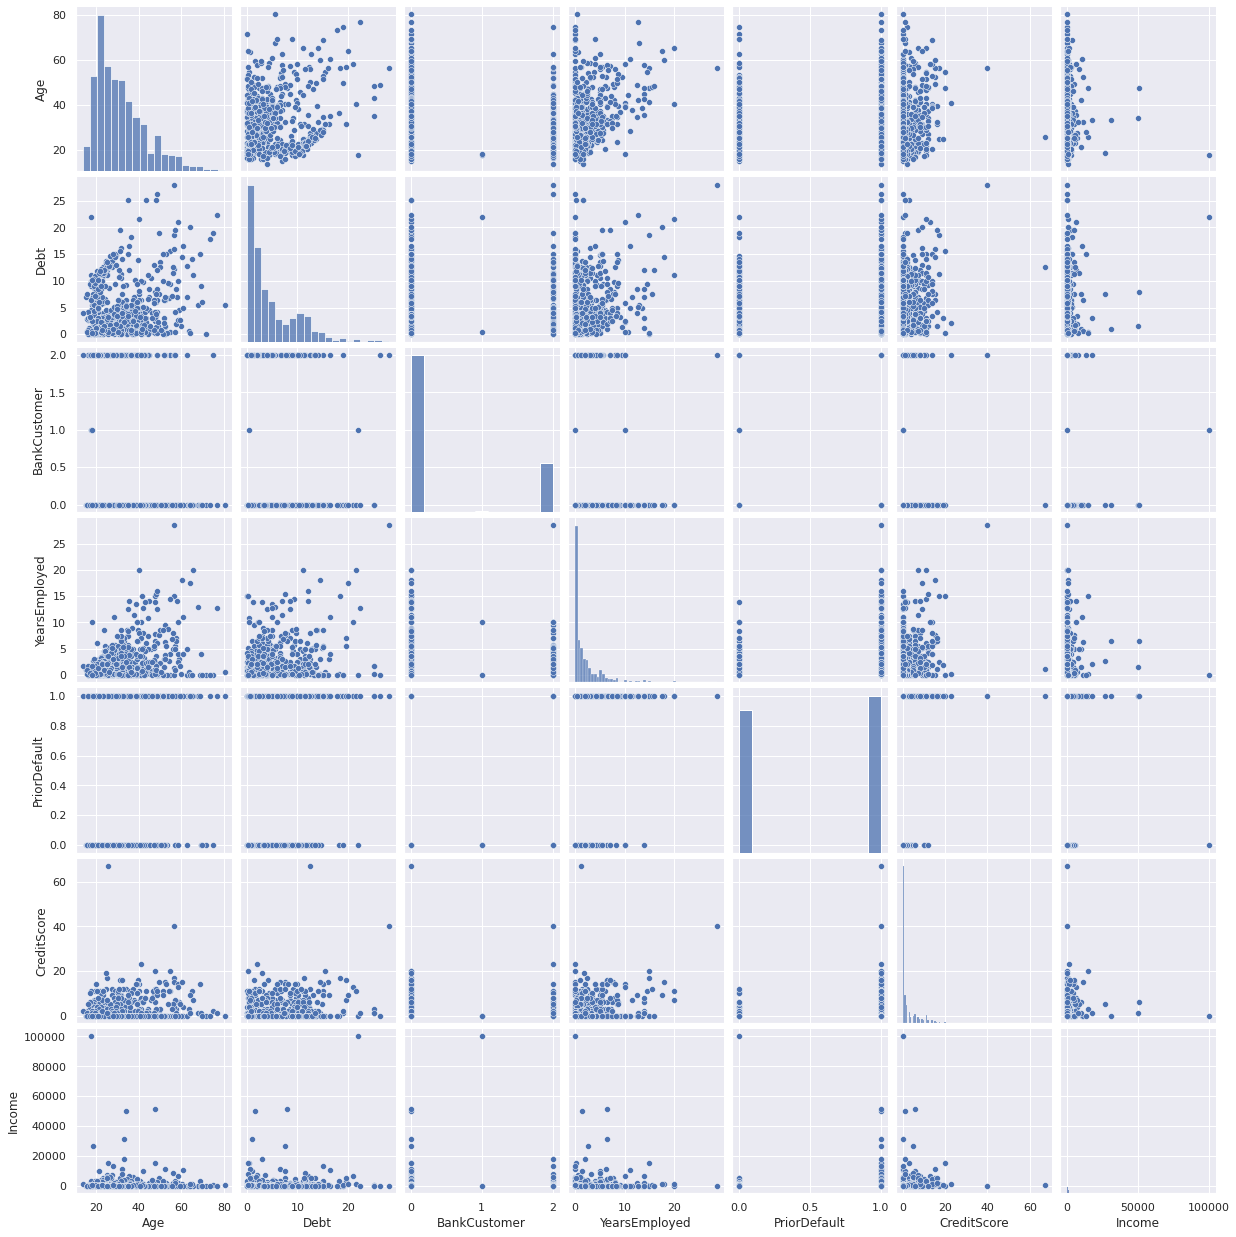

<Figure size 432x288 with 0 Axes>

In [115]:
#scatterplot
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore','Income']
sns.pairplot(credit_drop[cols], size = 2.5)
plt.show();
plt.savefig('scatterplot.jpg')

In [116]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'Ethnicity', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1'],
      dtype='object')

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
credit_dummies.to_numpy

<bound method DataFrame.to_numpy of      Gender    Age    Debt  ...  Citizen_2  DriversLicense_0  DriversLicense_1
0         1  30.83   0.000  ...          0                 1                 0
1         0  58.67   4.460  ...          0                 1                 0
2         0  24.50   0.500  ...          0                 1                 0
3         1  27.83   1.540  ...          0                 0                 1
4         1  20.17   5.625  ...          1                 1                 0
..      ...    ...     ...  ...        ...               ...               ...
685       1  21.08  10.085  ...          0                 1                 0
686       0  22.67   0.750  ...          0                 0                 1
687       0  25.25  13.500  ...          0                 0                 1
688       1  17.92   0.205  ...          0                 1                 0
689       1  35.00   3.375  ...          0                 0                 1

[690 rows x 33 

In [119]:
X,y = credit_dummies.iloc[:,credit_dummies.columns != 'Approved'] , credit_dummies["Approved"]

X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [120]:
X_train.head()

,Gender,Age,Debt,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Married_0,Married_1,Married_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,EducationLevel_7,EducationLevel_8,EducationLevel_9,EducationLevel_10,EducationLevel_11,EducationLevel_12,EducationLevel_13,Citizen_0,Citizen_1,Citizen_2,DriversLicense_0,DriversLicense_1
227,0,22.50,8.460,2,7,2.460,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
469,1,16.33,4.085,0,3,0.415,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
237,1,21.33,7.500,0,7,1.415,1,1,1,9800,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
120,1,39.92,6.210,0,7,0.040,1,1,1,300,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
273,1,38.25,10.125,2,7,0.125,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [122]:
rescaledX = scaler.transform(X)


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.8695652173913043


array([[48, 14],
       [ 4, 72]])

Feature ranking:
1. feature 6 (0.262838)
2. feature 5 (0.105895)
3. feature 8 (0.103402)
4. feature 9 (0.090971)
5. feature 2 (0.089145)
6. feature 1 (0.078878)
7. feature 7 (0.064282)
8. feature 4 (0.027792)
9. feature 0 (0.015157)
10. feature 26 (0.012814)
11. feature 14 (0.011758)
12. feature 30 (0.011625)
13. feature 23 (0.011456)
14. feature 31 (0.010523)
15. feature 12 (0.009328)
16. feature 3 (0.008975)
17. feature 19 (0.008601)
18. feature 15 (0.008289)
19. feature 25 (0.007809)
20. feature 21 (0.007762)
21. feature 11 (0.007658)
22. feature 18 (0.007179)
23. feature 27 (0.007157)
24. feature 29 (0.006321)
25. feature 13 (0.006096)
26. feature 22 (0.005192)
27. feature 17 (0.004463)
28. feature 16 (0.004212)
29. feature 28 (0.001686)
30. feature 10 (0.001434)
31. feature 20 (0.000874)
32. feature 24 (0.000428)


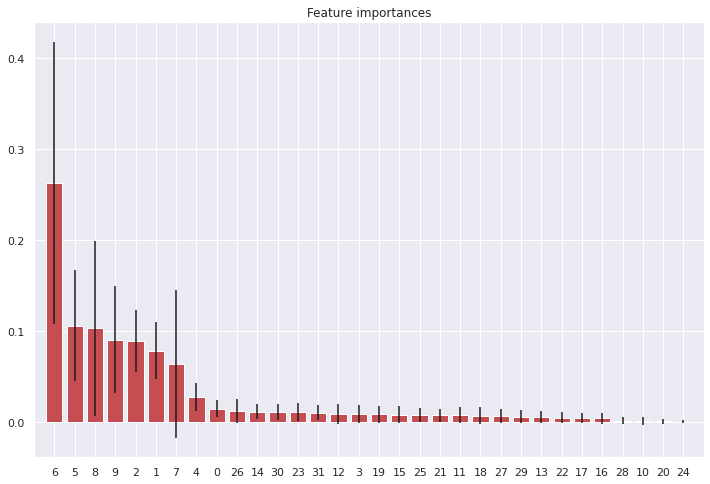

<Figure size 432x288 with 0 Axes>

In [124]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('featureimportance.jpg')

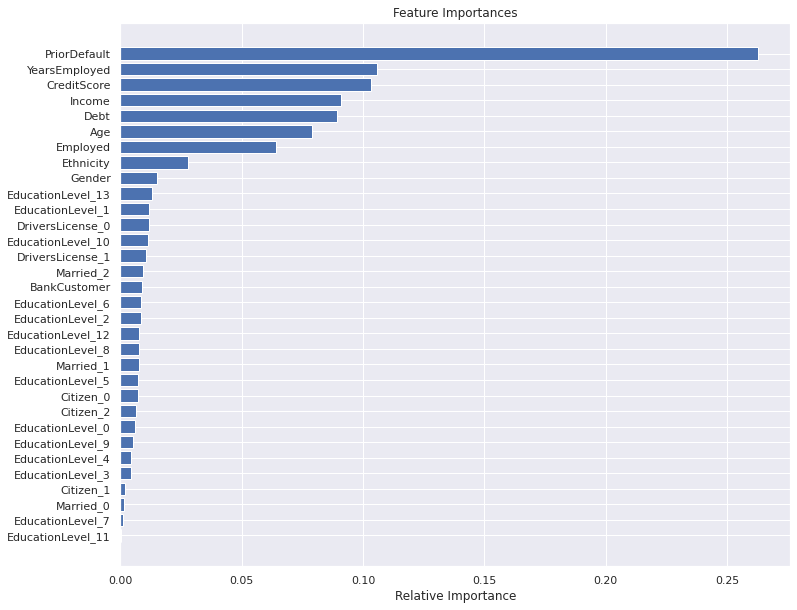

<Figure size 50400x7200 with 0 Axes>

In [125]:
credit_dummies = credit_dummies.drop(['Approved'], axis=1)
features = credit_dummies.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(700,100))
plt.savefig('features.jpg')